# Introduction

The project is focused on solving the Forest Cover Type Prediction: https://www.kaggle.com/c/forest-cover-type-prediction/overview. This task proposes a classification problem: predict the forest cover type (the predominant kind of tree cover) from strictly cartographic variables (as opposed to remotely sensed data).

The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. Each observation is a 30m x 30m patch. You are asked to predict an integer classification for the forest cover type. The seven types are:

1. Spruce/Fir
2. Lodgepole Pine
3. Ponderosa Pine
4. Cottonwood/Willow
5. Aspen
6. Douglas-fir
7. Krummholz

The training set (15120 observations) contains both features and the Cover_Type. The test set contains only the features. 

**You must predict the Cover_Type for every row in the test set (565892 observations).**

Data Fields

- Elevation - Elevation in meters
- Aspect - Aspect in degrees azimuth
- Slope - Slope in degrees
- Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
- Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
- Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
- Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
- Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
- Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
- Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
- Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
- Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
- Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation

The wilderness areas are:

1. Rawah Wilderness Area
2. Neota Wilderness Area
3. Comanche Peak Wilderness Area
4. Cache la Poudre Wilderness Area

The soil types are:

1. Cathedral family - Rock outcrop complex, extremely stony.
2. Vanet - Ratake families complex, very stony.
3. Haploborolis - Rock outcrop complex, rubbly.
4. Ratake family - Rock outcrop complex, rubbly.
5. Vanet family - Rock outcrop complex complex, rubbly.
6. Vanet - Wetmore families - Rock outcrop complex, stony.
7. Gothic family.
8. Supervisor - Limber families complex.
9. Troutville family, very stony.
10. Bullwark - Catamount families - Rock outcrop complex, rubbly.
11. Bullwark - Catamount families - Rock land complex, rubbly.
12. Legault family - Rock land complex, stony.
13. Catamount family - Rock land - Bullwark family complex, rubbly.
14. Pachic Argiborolis - Aquolis complex.
15. unspecified in the USFS Soil and ELU Survey.
16. Cryaquolis - Cryoborolis complex.
17. Gateview family - Cryaquolis complex.
18. Rogert family, very stony.
19. Typic Cryaquolis - Borohemists complex.
20. Typic Cryaquepts - Typic Cryaquolls complex.
21. Typic Cryaquolls - Leighcan family, till substratum complex.
22. Leighcan family, till substratum, extremely bouldery.
23. Leighcan family, till substratum - Typic Cryaquolls complex.
24. Leighcan family, extremely stony.
25. Leighcan family, warm, extremely stony.
26. Granile - Catamount families complex, very stony.
27. Leighcan family, warm - Rock outcrop complex, extremely stony.
28. Leighcan family - Rock outcrop complex, extremely stony.
29. Como - Legault families complex, extremely stony.
30. Como family - Rock land - Legault family complex, extremely stony.
31. Leighcan - Catamount families complex, extremely stony.
32. Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
33. Leighcan - Catamount families - Rock outcrop complex, extremely stony.
34. Cryorthents - Rock land complex, extremely stony.
35. Cryumbrepts - Rock outcrop - Cryaquepts complex.
36. Bross family - Rock land - Cryumbrepts complex, extremely stony.
37. Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
38. Leighcan - Moran families - Cryaquolls complex, extremely stony.
39. Moran family - Cryorthents - Leighcan family complex, extremely stony.
40. Moran family - Cryorthents - Rock land complex, extremely stony.

<a id="index" ></a>
<h1 align="left">
        INDEX
</h1>

* [Setup](#0)
* [1. Exploratory Data Analysis](#1)
    * [1.1. Initial Exploration](#2)
    * [1.2. Distribution of the Features](#3)
    * [1.3. Set Benchmark](#4)
* [2. Data Engineering](#5)
    * [2.1. Eliminate Redundancy & Initial Data Management](#6)
    * [2.2. Missing Values](#7)
    * [2.3. Create New Features](#8)
    * [2.4. Numerical Variables](#9)
        * [2.4.1. Normalise skewed features](#10)
        * [2.4.2. Outliers Analysis](#11)
    * [2.5. Categorical Variables](#12)
    * [2.6. Feature Selection & Feature Importance](#13)
    
* [3. Machine Learning](#14)
    * [3.1. Train Validation Split](#15)
    * [3.2. Construct the Pipeline](#16)
        * [3.2.1. Column Transformer](#17)
        * [3.2.2. Algorithm Pipeline](#18)
    * [3.3. Train the model with different algorithms/hyperparameters](#19)
* [4. Evaluate the Model](#20)
    * [4.1. Best Performing Model](#21)
    * [4.2. Adjusting Learning Rate with Validation Curve](#22)
    * [4.3. Test the Final Model](#23)


<a id='0'></a>

# Setup

In [1]:
import pandas as pd
import numpy as np
import re
from scipy import stats
import itertools
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

import seaborn as sns
%matplotlib inline

#Feature Engineering
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score, validation_curve
#from category_encoders.wrapper import PolynomialWrapper
#from category_encoders import TargetEncoder
from sklearn.preprocessing import PowerTransformer

#Train Test Split
from sklearn.model_selection import train_test_split

#Dimensionality reduction
from sklearn.decomposition import PCA

#Regularization
from sklearn.linear_model import Ridge, Lasso, ElasticNet

#Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#Evaluation, 
from sklearn.metrics import roc_auc_score, precision_recall_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix, f1_score, roc_curve, matthews_corrcoef
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc

from sklearn import set_config
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer, MinMaxScaler, OrdinalEncoder, PowerTransformer
from sklearn.compose import make_column_transformer, make_column_selector, ColumnTransformer
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.impute import SimpleImputer


from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

from sklearn.metrics import plot_confusion_matrix

import warnings
warnings.filterwarnings("ignore")

C:\Users\timor\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


#### UDF

In [2]:
def standardize_data(data):
    """
    This function intends to standardize data that might be in 
    different scales.
    """
    mu = data.mean()
    sigma = data.std()
    
    standardized_num = {}
    for mean, std, column in zip(mu.values, sigma.values, mu.index):
        standardized_num[column] = (data[column]-mean)/std

    return standardized_num

def number_outliers(data, IQR_num):
    number_outliers = {}
    
    for column in data.columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1

        threshold_upper = Q3 + (IQR_num * IQR)
        threshold_lower = Q1 - (IQR_num * IQR)
        number_outliers[column] = data[
            ((data[column]>threshold_upper) | (data[column]<threshold_lower))
            ][column].count()
    return number_outliers

def identify_outliers(data, column, IQR_num):
    
    """
    This function enables to perfrom the Interquartile Range Calculations on the inserted dataset,
    and return not only the number of outliers of the specified feature, but also the index of those on the original dataset
    """
    
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    threshold_upper = Q3 + (IQR_num * IQR)
    threshold_lower = Q1 - (IQR_num * IQR)

    to_drop_index = data[((data[column] > threshold_upper) | (data[column] < threshold_lower))].index

    number_outliers = data[
        ((data[column]>threshold_upper) | (data[column]<threshold_lower))
        ][column].count()
    return number_outliers, to_drop_index

#The Normal Shapiro test helps to confirm the initial guess about non-normality
def normality_test(dataset, numeric_columns):
    
    for column in numeric_columns:
    
        shapiro = stats.shapiro(dataset[column].dropna(0))

        if shapiro[1]<0.05:

            print(f"The Shapiro Wilk test p-value of {round(shapiro[1], 5)}, therefore {column} is not normally distributed")

        else:
            print(f"The Shapiro Wilk test p-value of {round(shapiro[1], 5)}, therefore {column} is normally distributed")

[Index](#index)
<a id='1'></a>

# 1. Exploratory Data Analysis

Our aim for the Exploratory Data Analysis is to identify relevant characteristics from our dataset to enhance our knowledge and take better decisions for the feature engineering and Machine Learning parts of this project. At first, we will explore general characteristics of our train data, the visualize our features' distributions, correlations, and we will dive in depth into the Soil_types and Wilderness_Area_Types to understand better these features and how our target Cover_Type is related to them. We will then proceed with our benchmark with a logistic regression before creating new features

<a id='2'></a>
## 1.1 Initial exploration

We printed our train and test dataframe.
There is approx 15K rows and 55 columns for the train dataset and 56k rows and 54 columns for the test dataset.
There is some numerical and categircal features

In [3]:
train = pd.read_csv("train.csv", index_col=0)
test = pd.read_csv("test.csv",  index_col=0)

In [4]:
train.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,,,,,,,,,,,,,,,,,,,,,
1,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
2,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
3,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
4,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
5,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [5]:
print(train.shape)
print(test.shape)

(15120, 55)
(565892, 54)


In [6]:
train.describe().T.head(5)

,count,mean,std,min,25%,50%,75%,max
Elevation,15120.0,2749.322553,417.678187,1863.0,2376.0,2752.0,3104.0,3849.0
Aspect,15120.0,156.676653,110.085801,0.0,65.0,126.0,261.0,360.0
Slope,15120.0,16.501587,8.453927,0.0,10.0,15.0,22.0,52.0
Horizontal_Distance_To_Hydrology,15120.0,227.195701,210.075296,0.0,67.0,180.0,330.0,1343.0
Vertical_Distance_To_Hydrology,15120.0,51.076521,61.239406,-146.0,5.0,32.0,79.0,554.0


In [7]:
a = train.pivot_table( index = 'Cover_Type', values = train.columns, aggfunc = 'mean')
a

,Aspect,Elevation,Hillshade_3pm,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points,Horizontal_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Slope,Soil_Type1,...,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Vertical_Distance_To_Hydrology,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
Cover_Type,,,,,,,,,,,,,,,,,,,,,
1,159.463426,3128.025926,144.065741,211.690278,223.248611,1994.412963,271.507407,2579.715741,13.112963,0.000000,...,0.000000,0.000000,0,0.000000,0.000463,41.281481,0.491667,0.083796,0.424537,0.000000
2,151.097222,2922.540278,142.950926,214.044444,225.369907,2155.277315,287.728704,2425.791667,13.423611,0.000000,...,0.000000,0.003241,0,0.000463,0.004167,47.337963,0.525000,0.030556,0.435185,0.009259
3,173.672685,2398.423148,141.549537,201.655556,216.561111,916.909722,210.723148,969.595833,20.628704,0.056019,...,0.025463,0.114815,0,0.000000,0.000000,64.081944,0.000000,0.000000,0.399537,0.600463
4,138.099537,2223.420370,111.808796,227.968056,216.889815,860.540741,104.537500,915.100463,18.468519,0.064352,...,0.018056,0.112963,0,0.000000,0.000000,40.143519,0.000000,0.000000,0.000000,1.000000
5,137.992130,2786.801389,121.392593,223.368981,218.317130,1530.388889,208.873148,1329.318519,16.724537,0.000000,...,0.000000,0.000000,0,0.000000,0.000000,50.871296,0.396296,0.000000,0.603704,0.000000
6,180.617130,2423.276852,147.682407,193.562963,209.960648,1057.654167,160.095370,1064.980556,18.986111,0.043981,...,0.032870,0.069907,0,0.000000,0.000000,44.873611,0.000000,0.000000,0.445370,0.554630
7,155.794444,3362.769907,136.193981,216.639815,222.412037,2062.847222,346.904630,2713.659722,14.166667,0.000000,...,0.000000,0.000000,0,0.000000,0.000000,68.945833,0.252315,0.116667,0.631019,0.000000


In [8]:
# include how many of each cover type 

In [9]:
train["Cover_Type"] = train["Cover_Type"].astype("category")
train["Cover_Type"].value_counts()

1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
Name: Cover_Type, dtype: int64

<a id='3'></a>
## 1.2. Distribution of Initial Features

Since there are numerous features considered to be numerical, an initial readjustment has to be done. The categorical features that have less than 3 different values will be excluded in the initial distirbution plotting.

In [10]:
#Save the initial version of the data for the benchmark
train_benchmark = train.copy()

#### Numerical Data

In [11]:
list_numfeat = [column for column in train.columns if (len(train[column].unique()) > 2) and (column != 'Cover_Type')] 
cat_features = train.loc[:,~train.columns.isin(list_numfeat)]
num_features = train.loc[:,~train.columns.isin(cat_features)]

In [12]:
print(f"The numerical features are: {list(num_features.columns)}")


The numerical features are: ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']


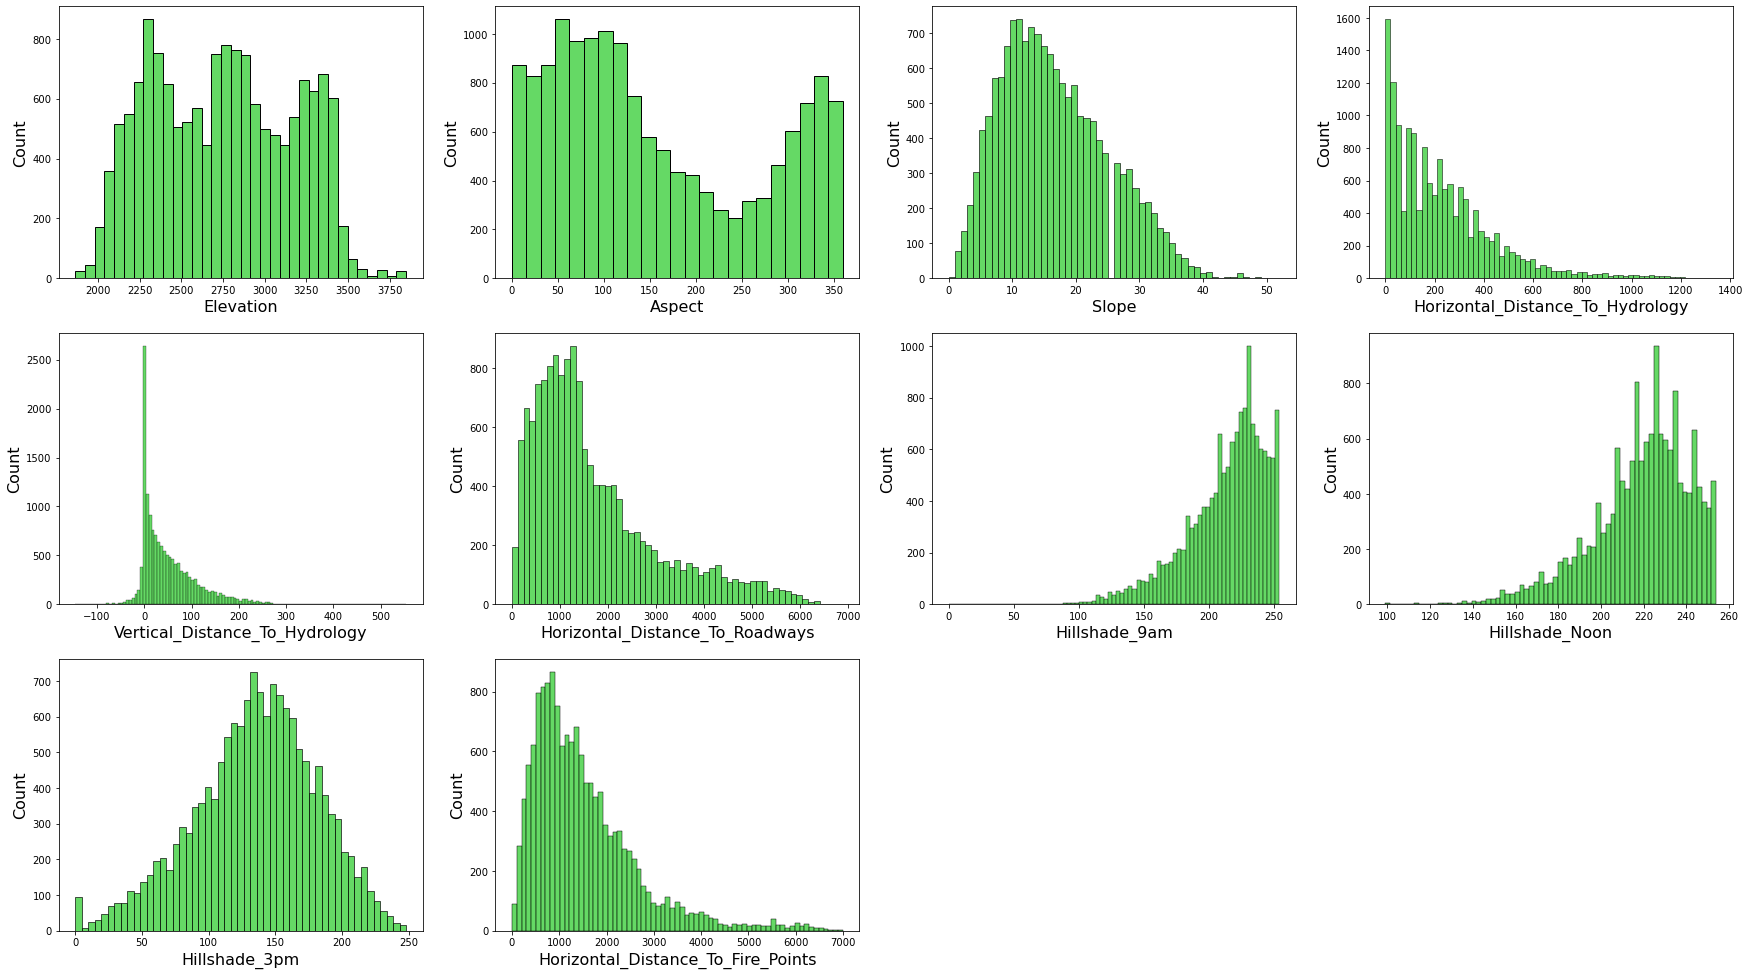

In [13]:
numerical_features = num_features.columns

fig, axes = plt.subplots(3, 4, figsize = (30, 17))
fig.delaxes(axes[2][2])
fig.delaxes(axes[2][3])

for feature, ax in zip(numerical_features, axes.ravel()):
    sns.histplot(x=train[feature],color= 'limegreen', ax=ax)
    ax.set_xlabel(feature, size=16)
    ax.set_ylabel("Count", size=16)

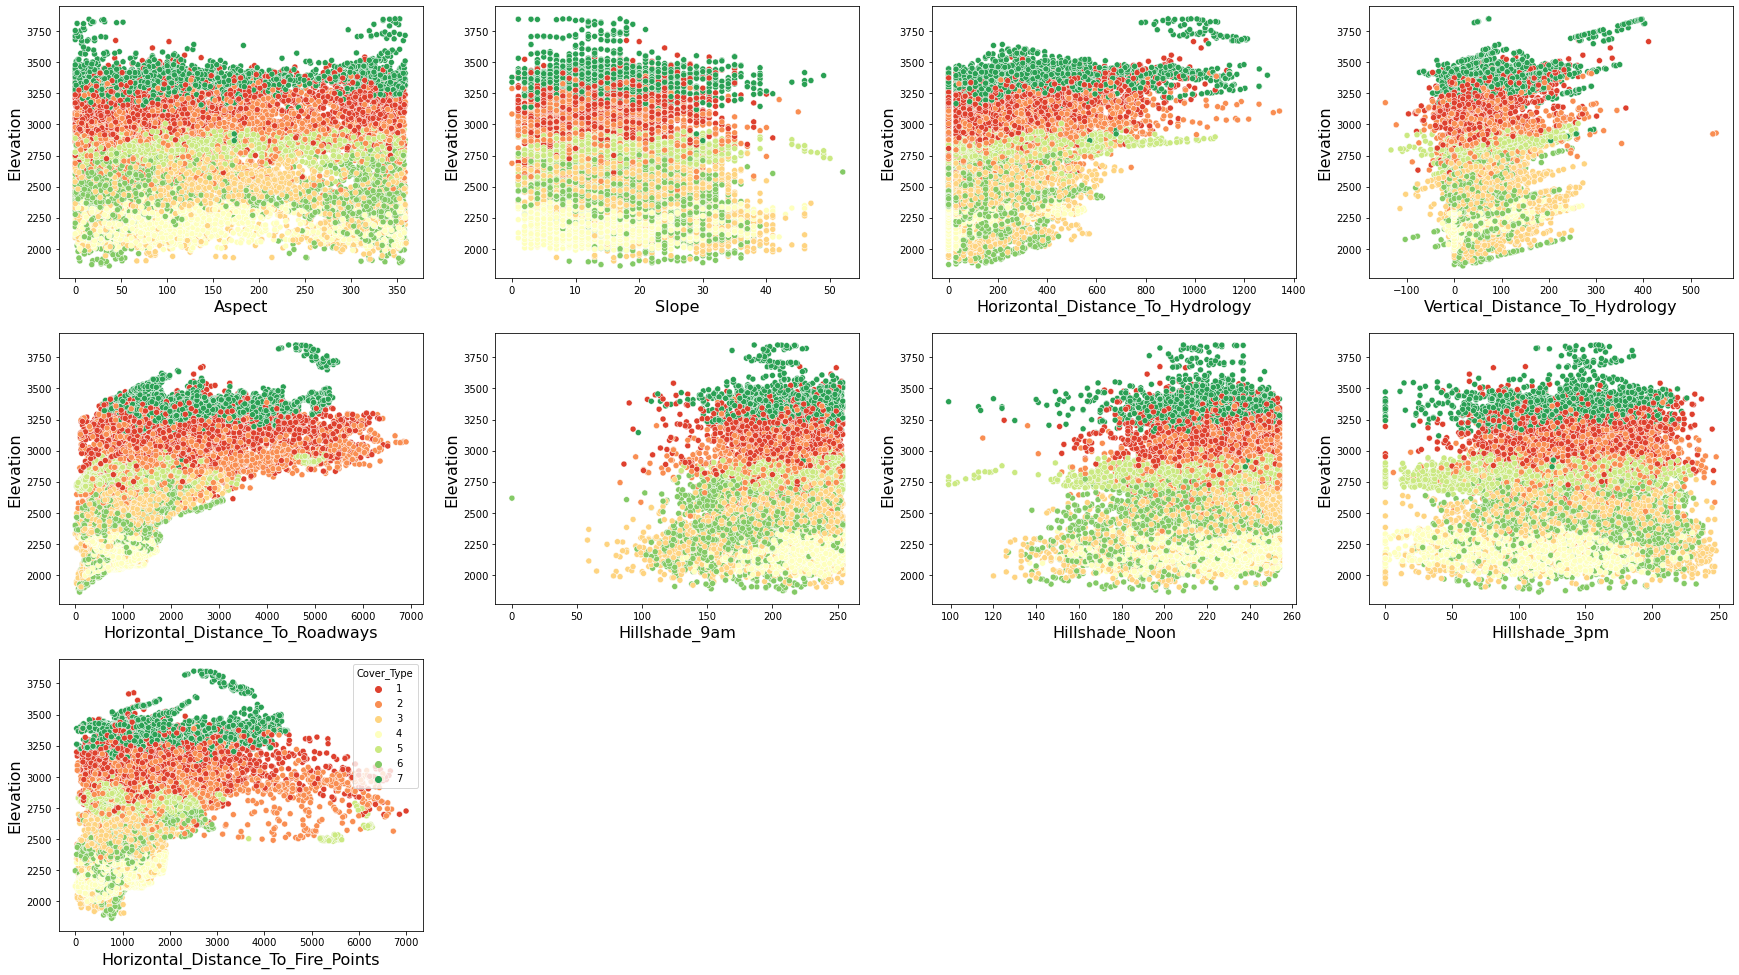

In [14]:
fig, axes = plt.subplots(3, 4, figsize = (30, 17))
fig.delaxes(axes[2][2])
fig.delaxes(axes[2][3])
fig.delaxes(axes[2][1])

for feature, ax, leg in zip(numerical_features[1:], axes.ravel(),[False]*8 + [True]):
    sns.scatterplot(x=train[feature], y=train[numerical_features[0]], hue=train["Cover_Type"],palette="RdYlGn", ax=ax, legend =leg)
    ax.set_xlabel(feature, size=16)
    ax.set_ylabel("Elevation", size=16)
    
plt.show()

#### Correlation between numerical features

We see there is > 0.6 corr between:

     1.vertical and horizontal distance to hydrology
     2.aspect and hillshade_3pm
     3.hillshade_noon and hillshade_3pm

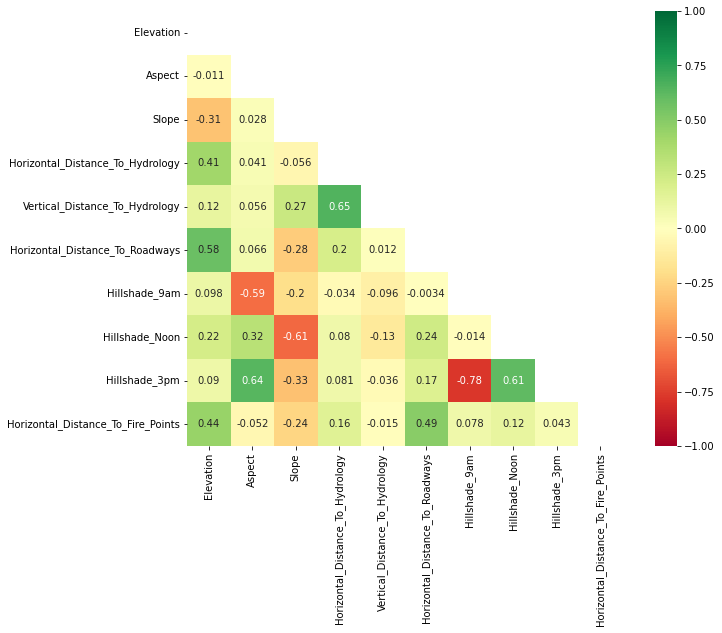

In [15]:
corrmat = train[numerical_features].iloc[:,:10].corr()
mask = np.triu(np.ones_like(corrmat, bool))
f, ax = plt.subplots(figsize = (12,8))
sns.heatmap(corrmat, cmap='RdYlGn', vmax=1, vmin = -1, annot=True, square=True, mask=mask);

#### Categorical Data

First, it is convenient to ensure that the data is in fact categorical

In [16]:
print(f"Categorical features: {list(cat_features.columns)}")

Categorical features: ['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40', 'Cover_Type']


In [17]:
soil_columns = [re.findall(".*e\d+$", i)[0] for i in train.columns if "Soil" in i]
wilderness_columns = [re.findall(".*a\d+$", i)[0] for i in train.columns if "Wilderness" in i]

In [18]:
# we check that each ID has only one Wilderness area type
print(f"Unique values for Wilderness Area: {train.loc[:, wilderness_columns].sum(axis=1).unique()[0]}")
#no results so 1 area per row so all good for areas

Unique values for Wilderness Area: 1


In [19]:
# we check that each ID has only one Soil type
print(f"Unique values for Soil Type: {train.loc[:, soil_columns].sum(axis=1).unique()[0]}")

Unique values for Soil Type: 1


The features can now be reverse encoded and analyzed which type and area appears the most and so might be the one that is the most common in the train and also in the test set.

<a id="wilderness" ></a>

In [20]:
train['Wilderness_Area_Type'] = (train.loc[:, wilderness_columns] == 1).idxmax(1)
train["Wilderness_Area_Type"] = train["Wilderness_Area_Type"].astype("category")
test['Wilderness_Area_Type'] = (test.loc[:, wilderness_columns] == 1).idxmax(1)
test["Wilderness_Area_Type"] = test["Wilderness_Area_Type"].astype("category")

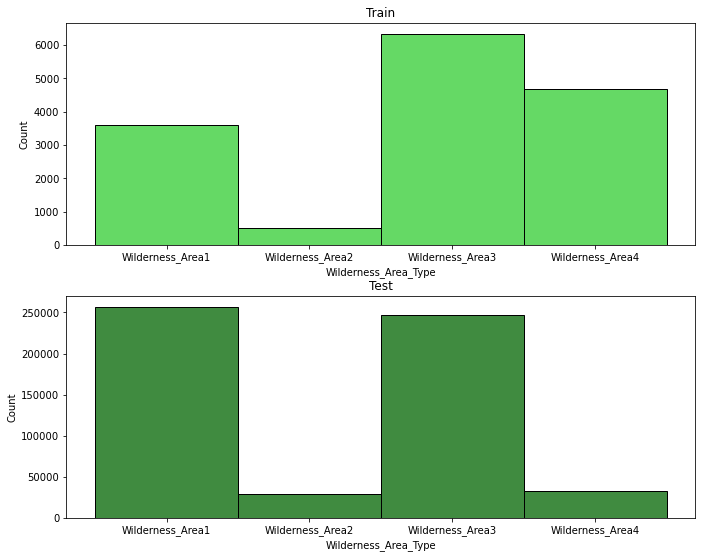

In [21]:
#AREA TYPE FREQUENCY IN TRAIN AND TEST

fig, axes = plt.subplots(2, 1, figsize=(10, 8))
fig.tight_layout(pad=3)
sns.histplot(train, x = 'Wilderness_Area_Type', binwidth = 1,color= "limegreen" ,ax=axes[0])
axes[0].set_title("Train")
sns.histplot(test, x = 'Wilderness_Area_Type', binwidth = 1,color= "darkgreen", ax=axes[1])
axes[1].set_title("Test")
plt.show()

In [22]:
train['Soil_Type'] = (train.loc[:, soil_columns] == 1).idxmax(1)
train["Soil_Type"] = train["Soil_Type"].astype("category") # plot
test['Soil_Type'] = (test.loc[:, soil_columns] == 1).idxmax(1)
test["Soil_Type"] = test["Soil_Type"].astype("category") # plot

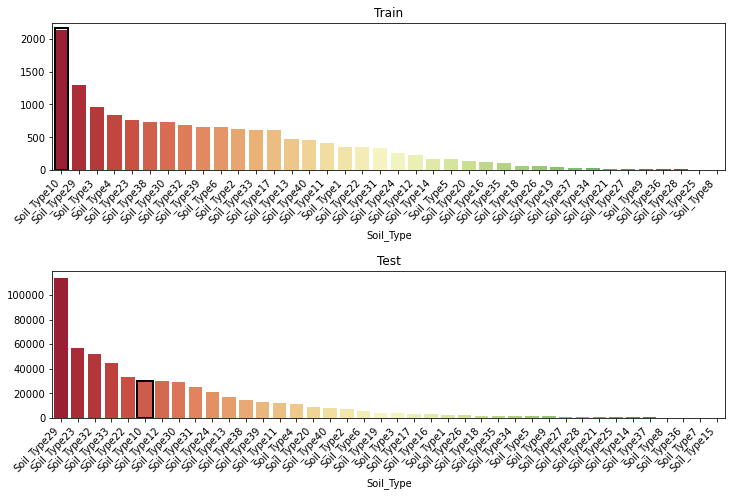

In [23]:
#Frequency of Soil Type in TRAIN and TEST
frequency_soil_train = train.groupby("Soil_Type").count().sort_values("Cover_Type", ascending=False)
frequency_soil_test = test.groupby("Soil_Type").count().sort_values("Elevation", ascending=False)


fig, axes = plt.subplots(2, 1, figsize=(12, 8))
fig.tight_layout(pad=8)

sns.barplot(frequency_soil_train.index,
            frequency_soil_train["Cover_Type"].values, 
            order=frequency_soil_train.sort_values("Cover_Type", ascending=False).index,
            palette="RdYlGn",
            ax=axes[0])
axes[0].set_title("Train")
axes[0].set_xticklabels(frequency_soil_train.index, rotation=45, ha="right")
axes[0].add_patch( Rectangle((-.35, .75),
                        .75, 2170,
                        fc ='none', 
                        ec ='black',
                        lw = 2))



sns.barplot(frequency_soil_test.index,
            frequency_soil_test["Elevation"].values, 
            order=frequency_soil_test.sort_values("Elevation", ascending=False).index,
            palette="RdYlGn",
            ax=axes[1])
axes[1].set_title("Test")
axes[1].set_xticklabels(frequency_soil_test.index, rotation=45, ha="right")
axes[1].add_patch( Rectangle((4.55, 5.85),
                        .95, 30000,
                        fc ='none', 
                        ec ='black',
                        lw = 2))

plt.show()



As we can see, Soil Type distribution is clearly not the same between the train and the test set!

#### Distribution of the Target Variable

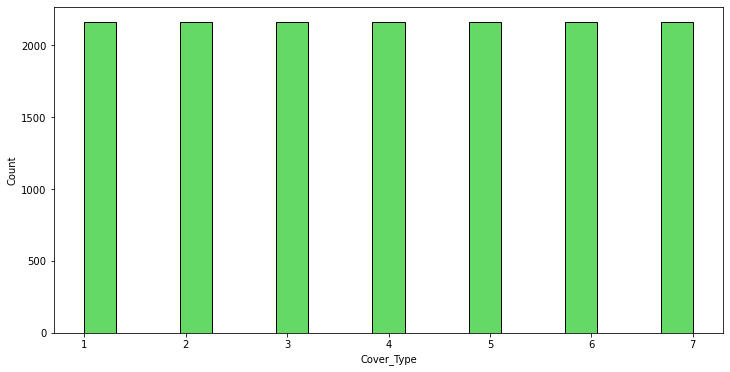

In [24]:
plt.figure(figsize=(12, 6))

sns.histplot(train.loc[:, "Cover_Type"].astype("int64"), color = 'limegreen')
plt.show()

We can observe how the **Target Feature _Cover Type_** is _uniformly distributed_

<a id='4'></a>
## 1.3. Establish Benchmark

In [25]:

X = train_benchmark.drop("Cover_Type", 1) #all the columns less the predicitons
y = train_benchmark["Cover_Type"] #only the last columns¡

In [26]:
log_r = LogisticRegression()

log_r.fit(X, y)

y_hat = log_r.predict(X)
accuracy = accuracy_score(y, y_hat)

print(f"The accuracy of the benchmark is: {accuracy}")

The accuracy of the benchmark is: 0.47903439153439153


In [27]:
from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix

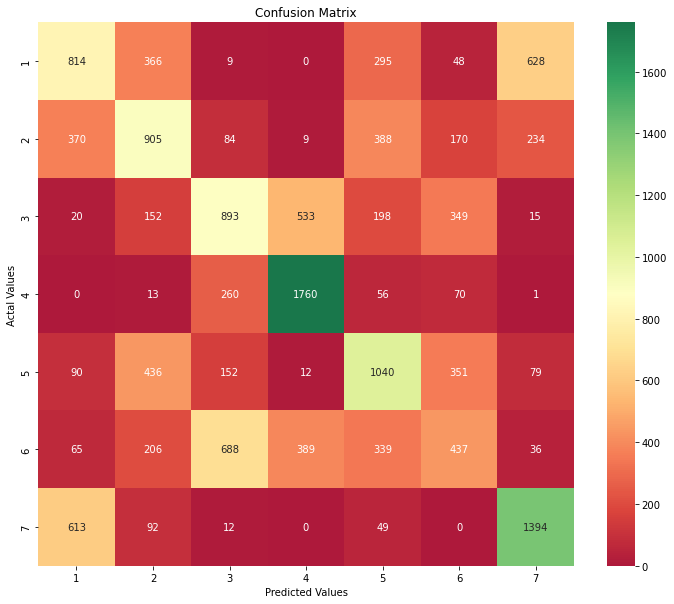

In [28]:
multic_cm = pd.DataFrame(confusion_matrix(y, y_hat), index= [1,2,3,4,5,6,7], columns= [1,2,3,4,5,6,7])

from matplotlib import pyplot as plt, patches
fig, axes = plt.subplots(figsize=(12, 10))

sns.heatmap(multic_cm, xticklabels=[1, 2, 3,4, 5, 6, 7], yticklabels=[1, 2, 3,4, 5, 6, 7], annot=True, cmap="RdYlGn",fmt=".0f", ax=axes, alpha=.9)

plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

[Index](#index)
<a id='5'></a>
# 2. Data Engineering

We now proceed to data engineering step of the machine learning pipeline. In this section we will check for redundancies, null values, create new hopefully meaningful features, hunt our outliers, visualize our numerical and categorical features separately, and finish by performing a new benchmark transforming our data to see whether our feature engineering was meaningful or not.

<a id='6'></a>
## 2.1. Eliminate Redundancy & Initial Data Management

What mattered in this section is that Reverse encoding was applyed on the train and test data to see the frequency of each **wilderness area** and **Soil Type**.

[Wilderness Reverse Encoding](#wilderness)

[Soil Type Reverse Encoding](#soil)

<a id='7'></a>
## 2.2. Null Values

In [29]:
print(f"There are {train.isna().mean().sum()} Null Values")

There are 0.0 Null Values


<a id='8'></a>
## 2.3. Create New Features

In [30]:
#Extract the numbers of the Soil and Wilderness Area
train["Soil_Type"] = ["".join(re.findall(r"[0-9]", i)) for i in train['Soil_Type'].values]
train['Wilderness_Area_Type'] = ["".join(re.findall(r"[0-9]", i)) for i in train['Wilderness_Area_Type'].values]

In [31]:
# converting the string into int for easier manipulation and feature creation
train["Soil_Type"] = train["Soil_Type"].astype("int64")
train['Wilderness_Area_Type'] = train['Wilderness_Area_Type'].astype("int64")


In [32]:
train

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Wilderness_Area_Type,Soil_Type
Id,,,,,,,,,,,,,,,,,,,,,
1,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,5,1,29
2,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,5,1,29
3,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,2,1,12
4,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,2,1,30
5,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,5,1,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15116,2607,243,23,258,7,660,170,251,214,1282,...,0,0,0,0,0,0,0,3,3,4
15117,2603,121,19,633,195,618,249,221,91,1325,...,0,0,0,0,0,0,0,3,3,4
15118,2492,134,25,365,117,335,250,220,83,1187,...,0,0,0,0,0,0,0,3,3,4


In [33]:
def relationship_Soil_Wilderness(data):
    plot_relationship_soil_wild_soil = data.groupby(["Soil_Type", "Cover_Type"]).count()["Wilderness_Area1"].reset_index()
    plot_relationship_soil_wild_wilda = data.groupby(["Wilderness_Area_Type", "Cover_Type"]).count()["Wilderness_Area1"].reset_index()
    
    plot_relationship_soil_wild_soil["Count"] = plot_relationship_soil_wild_soil["Wilderness_Area1"].replace(0, np.nan)
    plot_relationship_soil_wild_soil.drop("Wilderness_Area1", 1, inplace=True)

    plot_relationship_soil_wild_wilda["Count"] = plot_relationship_soil_wild_wilda["Wilderness_Area1"].replace(0, np.nan)
    plot_relationship_soil_wild_wilda.drop("Wilderness_Area1", 1, inplace=True)

    plot_relationship_soil_wild_soil.dropna(inplace=True)
    plot_relationship_soil_wild_wilda.dropna(inplace=True)
    
    return plot_relationship_soil_wild_wilda, plot_relationship_soil_wild_soil
    
plot_relationship_soil_wild_wilda, plot_relationship_soil_wild_soil = relationship_Soil_Wilderness(train)

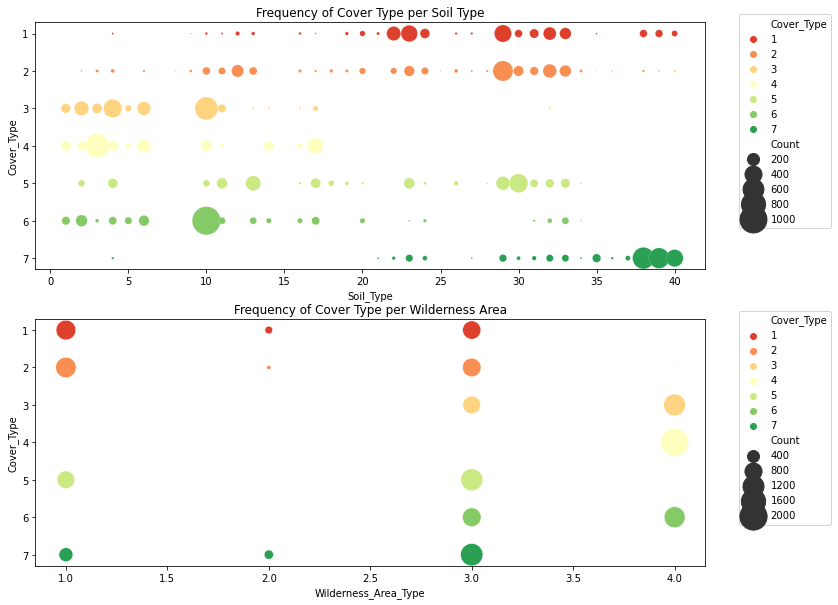

In [34]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10))
sns.scatterplot(x=plot_relationship_soil_wild_soil["Soil_Type"], y=plot_relationship_soil_wild_soil["Cover_Type"], hue=plot_relationship_soil_wild_soil["Cover_Type"], size=plot_relationship_soil_wild_soil["Count"],sizes=(1, 800), palette="RdYlGn", ax=axes[0])
axes[0].legend(bbox_to_anchor=(1.05, 0.6), loc="center left", borderaxespad=0)
axes[0].set_title("Frequency of Cover Type per Soil Type")

sns.scatterplot(x=plot_relationship_soil_wild_wilda["Wilderness_Area_Type"] , y=plot_relationship_soil_wild_wilda["Cover_Type"], hue=plot_relationship_soil_wild_wilda["Cover_Type"], size=plot_relationship_soil_wild_wilda["Count"],sizes=(1, 800),  palette="RdYlGn", ax=axes[1])
axes[1].legend(bbox_to_anchor=(1.05, 0.6), loc="center left", borderaxespad=0)
axes[1].set_title("Frequency of Cover Type per Wilderness Area")
plt.show()

### Soil family

In [35]:
Cathedral_Family = [1]
Ratake = [2,4]
Vanet = [5,6] 
Gothic = [7]
Troutville = [9]
Bullwark_Catamount = [10,11,13]
Rogert = [18]
Typic = [14, 16, 19, 20, 21, 17] 
Leighcan = [22,23,24,25,27,28,31,33,38]
Como_Legault = [12,29,30]
Moran = [39, 40]

def Soil_family(train):
    if train['Soil_Type'] in Cathedral_Family:
        return 'Cathedral'
    elif train['Soil_Type'] in Ratake:
        return 'Ratake'
    elif train['Soil_Type'] in Troutville:
        return 'Troutville'
    elif train['Soil_Type'] in Bullwark_Catamount:
        return 'Bullwark_Catamount'
    elif train['Soil_Type'] in Como_Legault:
        return 'Como_Legault'
    elif train['Soil_Type'] in Rogert:
        return 'Rogert'
    elif train['Soil_Type'] in Typic:
        return 'Typic'
    elif train['Soil_Type'] in Leighcan:
        return 'Leighcan'
    elif train['Soil_Type'] in Moran:
        return 'Moran'
    else:
        return 'unknown'
    
train['Soil_Family'] = train.apply(Soil_family, axis = 1).astype("category")
train['Soil_Family'].value_counts()

Leighcan              3060
Bullwark_Catamount    3024
unknown               2690
Como_Legault          2243
Ratake                1466
Moran                 1116
Typic                 1096
Cathedral              355
Rogert                  60
Troutville              10
Name: Soil_Family, dtype: int64

### Soil stoneness

In [36]:
extremely_stony = [1,24,25,27, 28, 29, 30, 31, 32,33,34,36,37,38,39,40]
extremely_bouldery = [22]
very_stony= [2,9,18,26]
stony= [6,12]
rubbly= [3,4,5,10,11,13,]

def Soil_stoneness(train):
    if train['Soil_Type'] in extremely_stony:
        return 'extremely_stony'
    elif train['Soil_Type'] in very_stony:
        return 'very_stony'
    elif train['Soil_Type'] in stony:
        return 'stony'
    elif train['Soil_Type'] in rubbly:
        return 'rubbly'
    elif train['Soil_Type'] in extremely_bouldery:
        return 'extremely_bouldery'
    else:
        return 'unknown'
    

    
train['Soil_Stoneness'] = train.apply(Soil_stoneness, axis = 1).astype("category")
train['Soil_Stoneness'].value_counts()

extremely_stony       6201
rubbly                4994
unknown               1956
stony                  877
very_stony             747
extremely_bouldery     345
Name: Soil_Stoneness, dtype: int64

### Soil complex

In [37]:
rock_outcrop_complex = [1,3,4,5,6,10,27,28,32,33,35,37]
rock_land_complex = [11,12,13,30,34,36,40]
aquolis_complex = [14,16,17,19,20,24,38] #cry- and cryoaquolis here as well
till_substratum_complex = [21,22,23]
family_complex = [2,8,26,29,31,39]

def Soil_complex(train):
    if train['Soil_Type'] in rock_outcrop_complex:
        return 'rock_outcrop'
    
    elif train['Soil_Type'] in rock_land_complex:
        return 'rock_land'
    
    elif train['Soil_Type'] in aquolis_complex:
        return 'aquolis_complex'
    
    elif train['Soil_Type'] in till_substratum_complex:
        return 'till_substratum'
    
    elif train['Soil_Type'] in family_complex:
        return 'family'
    else:
        return 'unknown'

    
train['Soil_Complex'] = train.apply(Soil_complex, axis = 1).astype("category")
train['Soil_Complex'].value_counts()

rock_outcrop       6583
family             2958
rock_land          2325
aquolis_complex    2065
till_substratum    1118
unknown              71
Name: Soil_Complex, dtype: int64

### Water altitude

In [38]:
train['Water_Altitude'] = (train['Vertical_Distance_To_Hydrology'] + train['Elevation'])/2

### Hydrology

In [39]:
train['Hydrology_Distance'] = (train['Horizontal_Distance_To_Hydrology']**2 + train['Vertical_Distance_To_Hydrology']**2)**0.5

### Cumulative sunlight

In [40]:
train['Cumulative_Sunlight'] = (train['Hillshade_9am'] + train['Hillshade_3pm'] + train['Hillshade_Noon']) #tobe modified and improved

### Elevation Bin

In [41]:
train['Elevation_bin']=KBinsDiscretizer(n_bins=[5], encode="ordinal").fit_transform(train[["Elevation"]])
train['Elevation_bin'] = train['Elevation_bin'].astype("category")

### Ratio horizontal distance firepoints/roadways

In [42]:
train['Mean_Distance_Firepoints_Roadways'] = (train['Horizontal_Distance_To_Fire_Points'] + train['Horizontal_Distance_To_Roadways'])/2

### Ratio horizontal distance/hydrology

In [43]:
train['Mean_Distance_Hydrology_Roadways'] = (train['Horizontal_Distance_To_Hydrology'] + train['Horizontal_Distance_To_Roadways'])/2

### Polynomial featuring 

In [44]:
ncol = train.select_dtypes(include=['int64', 'float64']).drop(soil_columns+wilderness_columns, 1)

In [45]:
ncol.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_Type',
       'Soil_Type', 'Water_Altitude', 'Hydrology_Distance',
       'Cumulative_Sunlight', 'Mean_Distance_Firepoints_Roadways',
       'Mean_Distance_Hydrology_Roadways'],
      dtype='object')

In [46]:
for col in train.columns:
    if col in ncol:
        train['sqrt'+ col] = np.sqrt(train[col])

In [47]:
for col in train.columns:
    if col in ncol:
        train['**2_'+ col] = (train[col])**2

In [48]:
# converting the int into string
train["Soil_Type"] = train["Soil_Type"].astype("category")
train['Wilderness_Area_Type'] = train['Wilderness_Area_Type'].astype("category")

<a id='9'></a>
## 2.4. Numerical Variables

In [49]:
num_features = train.select_dtypes(include=["int64", "float64"]).drop(soil_columns+wilderness_columns, 1)
numerical_features = num_features.columns

In [50]:
print(f"Numerical Features: {list(numerical_features)}")

Numerical Features: ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Water_Altitude', 'Hydrology_Distance', 'Cumulative_Sunlight', 'Mean_Distance_Firepoints_Roadways', 'Mean_Distance_Hydrology_Roadways', 'sqrtElevation', 'sqrtAspect', 'sqrtSlope', 'sqrtHorizontal_Distance_To_Hydrology', 'sqrtVertical_Distance_To_Hydrology', 'sqrtHorizontal_Distance_To_Roadways', 'sqrtHillshade_9am', 'sqrtHillshade_Noon', 'sqrtHillshade_3pm', 'sqrtHorizontal_Distance_To_Fire_Points', 'sqrtWilderness_Area_Type', 'sqrtSoil_Type', 'sqrtWater_Altitude', 'sqrtHydrology_Distance', 'sqrtCumulative_Sunlight', 'sqrtMean_Distance_Firepoints_Roadways', 'sqrtMean_Distance_Hydrology_Roadways', '**2_Elevation', '**2_Aspect', '**2_Slope', '**2_Horizontal_Distance_To_Hydrology', '**2_Vertical_Distance_To_Hydrology', '**2_Horizontal_Distance_T

#### Relationship with the Target

In [51]:
standardized_num = pd.DataFrame(standardize_data(num_features))
standardized_num["Cover_Type"] = train["Cover_Type"]

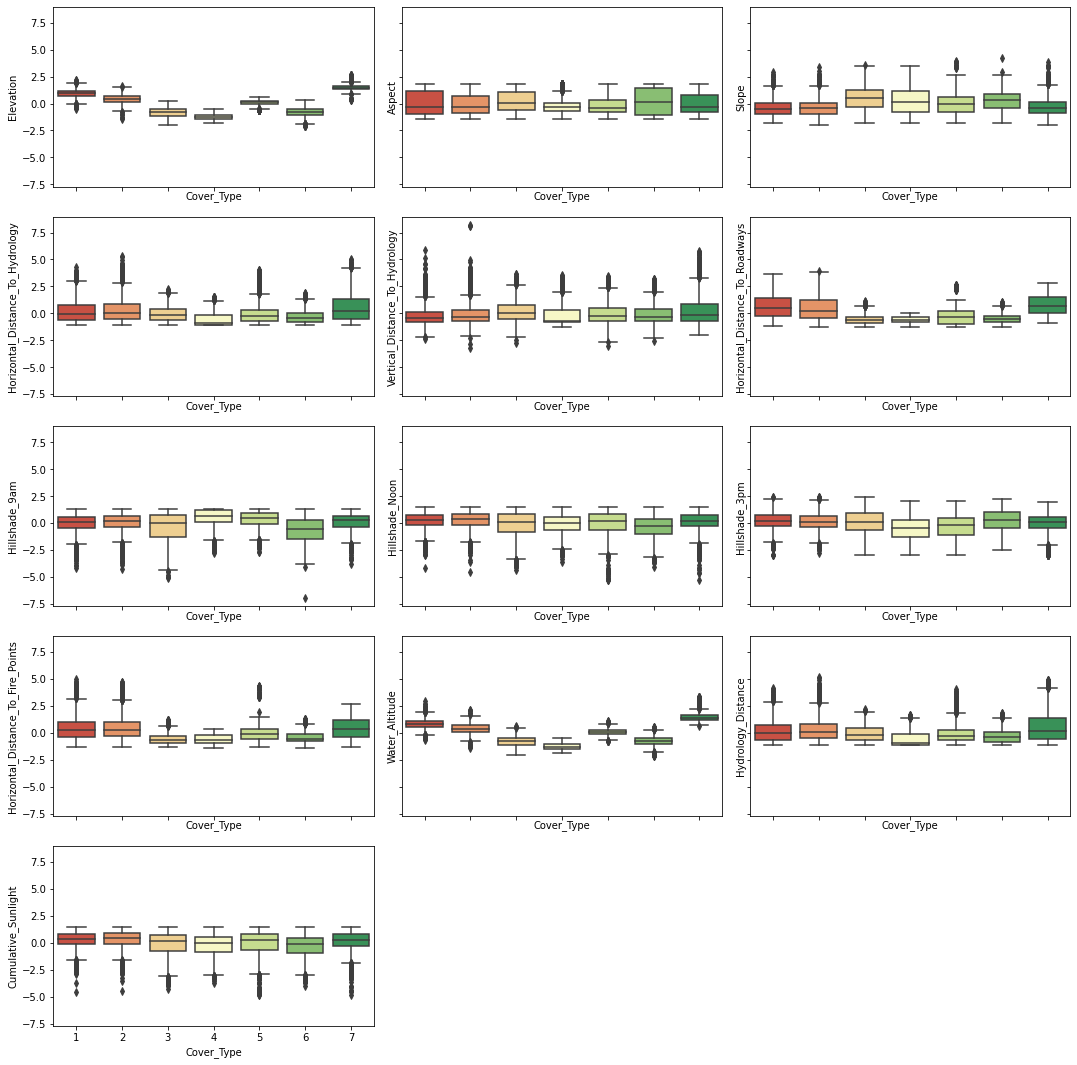

In [52]:
fig, axes = plt.subplots(5, 3 , figsize=(15, 15), sharex=True, sharey=True)
fig.delaxes(axes[4][1])
fig.delaxes(axes[4][2])
fig.tight_layout(pad=2)
for ax, feature in zip(axes.ravel(), num_features.columns):
    sns.boxplot(data=standardized_num[standardized_num.columns[:-1]], x=standardized_num["Cover_Type"], y=feature, ax=ax, palette= 'RdYlGn' )

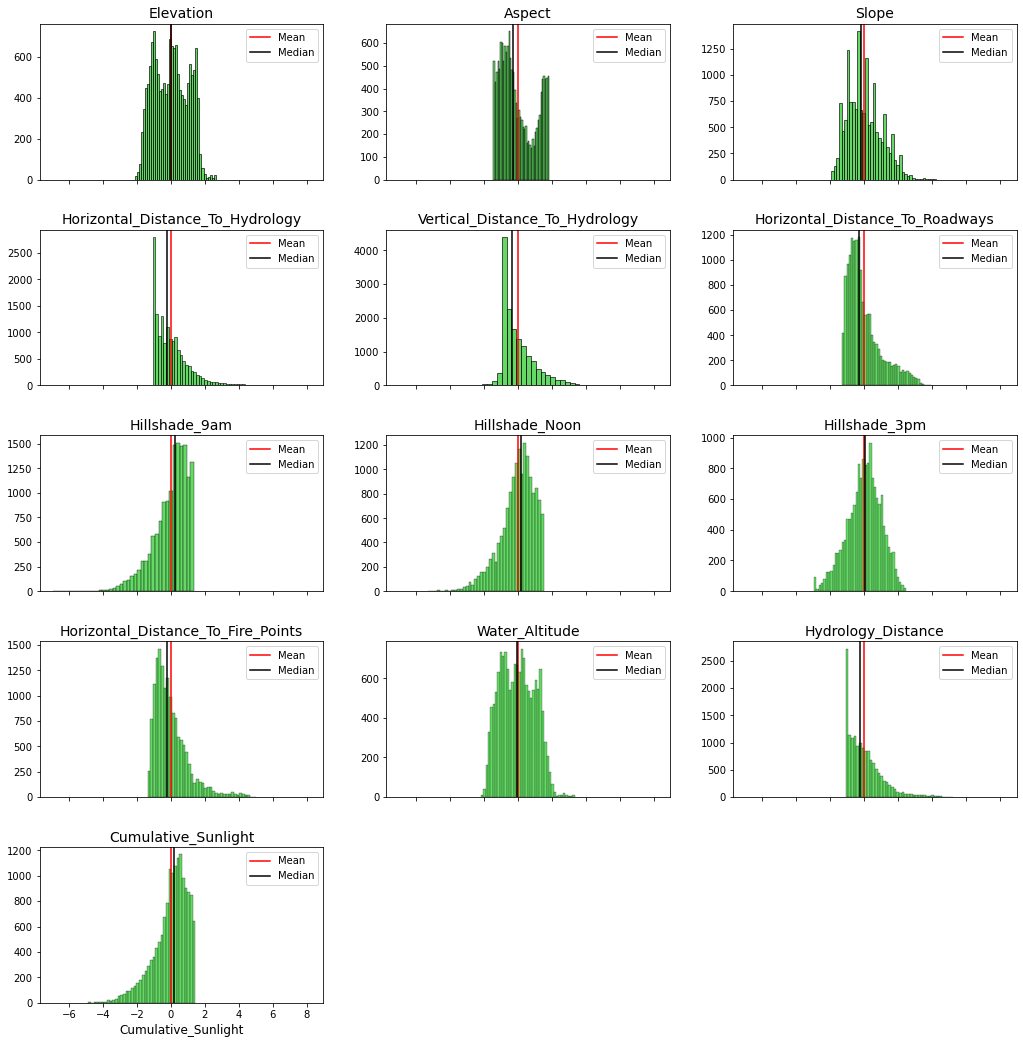

In [53]:
fig, axes = plt.subplots(5, 3 , figsize=(15, 15), sharex=True)
fig.delaxes(axes[4][1])
fig.delaxes(axes[4][2])
fig.tight_layout(pad=4)

for column, ax in zip(standardized_num.columns[:-1], axes.ravel()):
    
    sns.histplot(standardized_num.loc[:, column], bins=40, color='limegreen', ax=ax)
    ax.set_title(column, size=14)
    ax.axvline(np.mean(standardized_num.loc[:, column].dropna(0)), color="red")
    ax.axvline(np.median(standardized_num.loc[:, column].dropna(0)), color="black")
    ax.legend(["Mean", "Median"])
    ax.set_xlabel(column, size=12)
    ax.set_ylabel("", size=12)

#### Outliers on the Original Data

In [54]:
len(numerical_features)

49

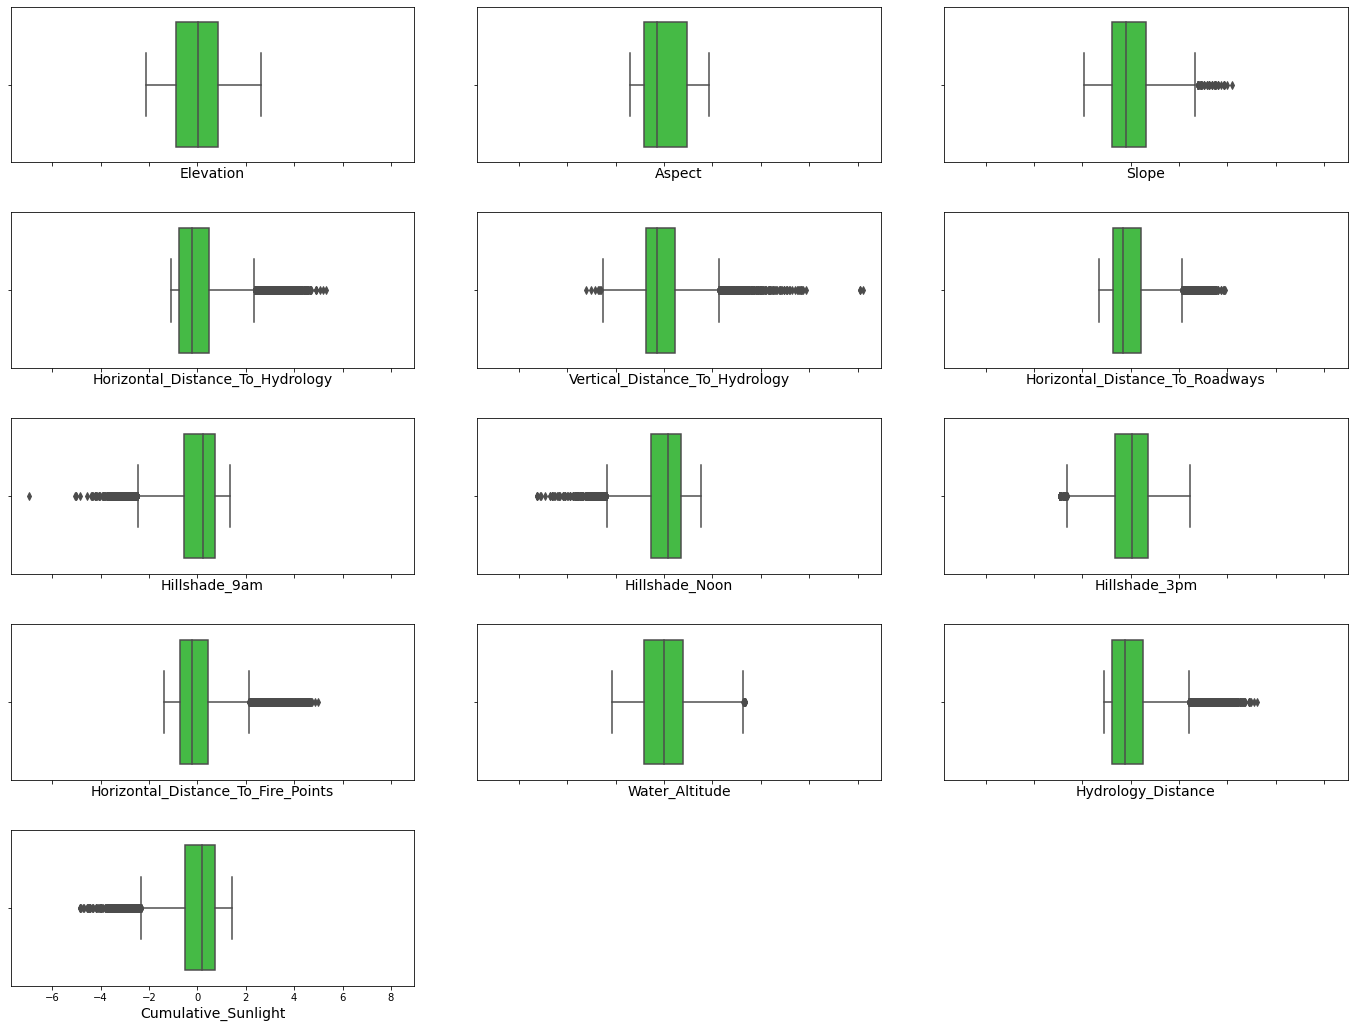

In [55]:
fig, axes = plt.subplots(5, 3, figsize = (20, 15), sharex=True)
fig.delaxes(axes[4][1])
fig.delaxes(axes[4][2])

fig.tight_layout(pad=4)
for feature, ax in zip(numerical_features, axes.ravel()):
    sns.boxplot(standardized_num[feature], ax=ax, color='limegreen')
    ax.set_xlabel(feature,size=14)

In [56]:
# we calculate the number of outliers in original numerical data

outliers = number_outliers(train[numerical_features], 1.5)
print(outliers)

{'Elevation': 0, 'Aspect': 0, 'Slope': 57, 'Horizontal_Distance_To_Hydrology': 512, 'Vertical_Distance_To_Hydrology': 586, 'Horizontal_Distance_To_Roadways': 830, 'Hillshade_9am': 408, 'Hillshade_Noon': 393, 'Hillshade_3pm': 124, 'Horizontal_Distance_To_Fire_Points': 645, 'Water_Altitude': 9, 'Hydrology_Distance': 469, 'Cumulative_Sunlight': 490, 'Mean_Distance_Firepoints_Roadways': 686, 'Mean_Distance_Hydrology_Roadways': 750, 'sqrtElevation': 0, 'sqrtAspect': 0, 'sqrtSlope': 12, 'sqrtHorizontal_Distance_To_Hydrology': 62, 'sqrtVertical_Distance_To_Hydrology': 25, 'sqrtHorizontal_Distance_To_Roadways': 48, 'sqrtHillshade_9am': 537, 'sqrtHillshade_Noon': 515, 'sqrtHillshade_3pm': 470, 'sqrtHorizontal_Distance_To_Fire_Points': 283, 'sqrtWilderness_Area_Type': 0, 'sqrtSoil_Type': 0, 'sqrtWater_Altitude': 0, 'sqrtHydrology_Distance': 44, 'sqrtCumulative_Sunlight': 593, 'sqrtMean_Distance_Firepoints_Roadways': 129, 'sqrtMean_Distance_Hydrology_Roadways': 89, '**2_Elevation': 0, '**2_Aspect

Lets Normalize the Data with the Power Transformer in order to see if ne number of significant outliers gets reduced

In [57]:
normality_test(num_features, numerical_features)

The Shapiro Wilk test p-value of 0.0, therefore Elevation is not normally distributed
The Shapiro Wilk test p-value of 0.0, therefore Aspect is not normally distributed
The Shapiro Wilk test p-value of 0.0, therefore Slope is not normally distributed
The Shapiro Wilk test p-value of 0.0, therefore Horizontal_Distance_To_Hydrology is not normally distributed
The Shapiro Wilk test p-value of 0.0, therefore Vertical_Distance_To_Hydrology is not normally distributed
The Shapiro Wilk test p-value of 0.0, therefore Horizontal_Distance_To_Roadways is not normally distributed
The Shapiro Wilk test p-value of 0.0, therefore Hillshade_9am is not normally distributed
The Shapiro Wilk test p-value of 0.0, therefore Hillshade_Noon is not normally distributed
The Shapiro Wilk test p-value of 0.0, therefore Hillshade_3pm is not normally distributed
The Shapiro Wilk test p-value of 0.0, therefore Horizontal_Distance_To_Fire_Points is not normally distributed
The Shapiro Wilk test p-value of 0.0, there

In [58]:
# apply the PowerTransformer to normalise the data

power = PowerTransformer(method='yeo-johnson', standardize=True)

numerical_trans = power.fit_transform(num_features)

In [59]:
scaled_numerical = pd.DataFrame(numerical_trans, columns=numerical_features)

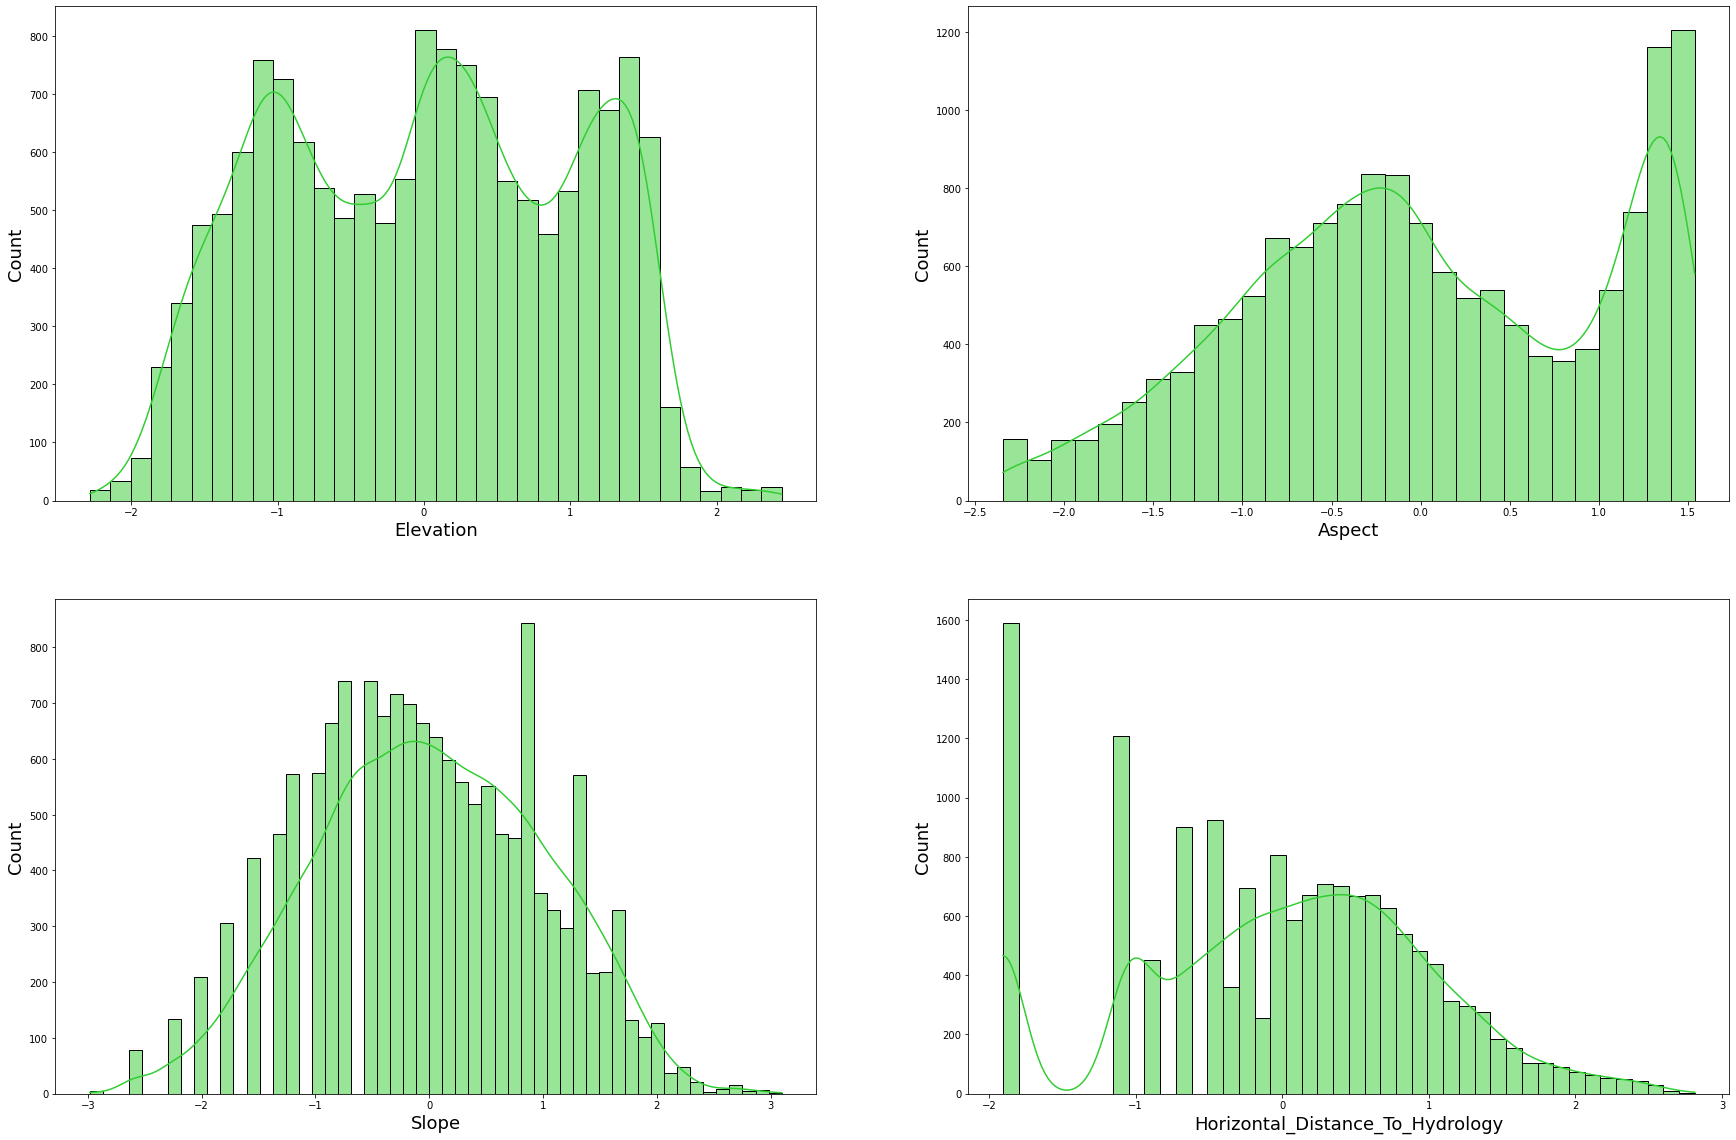

In [60]:
fig, axes = plt.subplots(2, 2, figsize = (30, 20))
before_after_numer_df = pd.merge(scaled_numerical, num_features, right_index=True, left_index=True)

for ax, scaled in zip(axes.ravel(), before_after_numer_df.columns[:4]):
    sns.histplot(data=before_after_numer_df, x=scaled, color='limegreen', label="Non Scaled", kde=True, ax=ax)
    ax.set_xlabel(scaled[:-2],size=18)
    ax.set_ylabel("Count",size=18)

#### Outliers on the Scaled data

In [61]:
# we calculate the number of outliers in original numerical data

outliers_scaled = number_outliers(scaled_numerical, 1.5)
print(outliers_scaled)

{'Elevation': 0, 'Aspect': 0, 'Slope': 12, 'Horizontal_Distance_To_Hydrology': 3, 'Vertical_Distance_To_Hydrology': 438, 'Horizontal_Distance_To_Roadways': 34, 'Hillshade_9am': 0, 'Hillshade_Noon': 0, 'Hillshade_3pm': 0, 'Horizontal_Distance_To_Fire_Points': 86, 'Water_Altitude': 0, 'Hydrology_Distance': 2, 'Cumulative_Sunlight': 0, 'Mean_Distance_Firepoints_Roadways': 70, 'Mean_Distance_Hydrology_Roadways': 53, 'sqrtElevation': 0, 'sqrtAspect': 0, 'sqrtSlope': 13, 'sqrtHorizontal_Distance_To_Hydrology': 7, 'sqrtVertical_Distance_To_Hydrology': 3, 'sqrtHorizontal_Distance_To_Roadways': 23, 'sqrtHillshade_9am': 0, 'sqrtHillshade_Noon': 0, 'sqrtHillshade_3pm': 0, 'sqrtHorizontal_Distance_To_Fire_Points': 83, 'sqrtWilderness_Area_Type': 0, 'sqrtSoil_Type': 0, 'sqrtWater_Altitude': 0, 'sqrtHydrology_Distance': 7, 'sqrtCumulative_Sunlight': 0, 'sqrtMean_Distance_Firepoints_Roadways': 68, 'sqrtMean_Distance_Hydrology_Roadways': 50, '**2_Elevation': 0, '**2_Aspect': 0, '**2_Slope': 7, '**2_Ho

In [62]:
features_with_outliers = [key for key in outliers_scaled.keys() if outliers_scaled[key]!=0]

In [63]:
features_with_outliers

['Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Horizontal_Distance_To_Fire_Points',
 'Hydrology_Distance',
 'Mean_Distance_Firepoints_Roadways',
 'Mean_Distance_Hydrology_Roadways',
 'sqrtSlope',
 'sqrtHorizontal_Distance_To_Hydrology',
 'sqrtVertical_Distance_To_Hydrology',
 'sqrtHorizontal_Distance_To_Roadways',
 'sqrtHorizontal_Distance_To_Fire_Points',
 'sqrtHydrology_Distance',
 'sqrtMean_Distance_Firepoints_Roadways',
 'sqrtMean_Distance_Hydrology_Roadways',
 '**2_Slope',
 '**2_Horizontal_Distance_To_Hydrology',
 '**2_Horizontal_Distance_To_Roadways',
 '**2_Horizontal_Distance_To_Fire_Points',
 '**2_Hydrology_Distance',
 '**2_Mean_Distance_Firepoints_Roadways',
 '**2_Mean_Distance_Hydrology_Roadways']

In [64]:
outliers_index = {}

for column in features_with_outliers:
    
    _, index_col = identify_outliers(num_features, column, 1.5)
    outliers_index[column] = list(index_col)

In [65]:
list_index_outliers = [outliers_index[key] for key in outliers_index.keys()]

In [66]:
index_with_outliers = set(list(itertools.chain.from_iterable(list_index_outliers)))
outliers_column = [1 if i in index_with_outliers else 0 for i in range(0, train.shape[0])]

In [67]:
print(f"There are {sum(outliers_column)} left after rescaling")

There are 4265 left after rescaling


In [68]:
train["Outliers"] = outliers_column

In [69]:
train["Outliers"] = train["Outliers"].astype("category")

In [70]:
train.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,**2_Hillshade_3pm,**2_Horizontal_Distance_To_Fire_Points,**2_Wilderness_Area_Type,**2_Soil_Type,**2_Water_Altitude,**2_Hydrology_Distance,**2_Cumulative_Sunlight,**2_Mean_Distance_Firepoints_Roadways,**2_Mean_Distance_Hydrology_Roadways,Outliers
Id,,,,,,,,,,,,,,,,,,,,,
1,2596,51,3,258,0,510,221,232,148,6279,...,21904,39425841,1,841,1684804.00,66564.0,361201,11522630.25,147456.0,0
2,2590,56,2,212,-6,390,220,235,151,6225,...,22801,38750625,1,841,1669264.00,44980.0,367236,10939556.25,90601.0,1
3,2804,139,9,268,65,3180,234,238,135,6121,...,18225,37466641,1,144,2057790.25,76049.0,368449,21627150.25,2972176.0,1
4,2785,155,18,242,118,3090,238,238,122,6211,...,14884,38576521,1,900,2106852.25,72488.0,357604,21627150.25,2775556.0,1
5,2595,45,2,153,-1,391,220,234,150,6172,...,22500,38093584,1,841,1682209.00,23410.0,364816,10768242.25,73984.0,1


<a id='10'></a>
## 2.5. Categorical Variables

Since the individual **Soil Types** and **Wilderness Areas** have been _inverse_ encoded into two single columns, we can proceed to drop the encoded features.

In [71]:
train.drop(soil_columns+wilderness_columns, 1, inplace=True)

In [72]:
train.select_dtypes(include="category").head()

,Cover_Type,Wilderness_Area_Type,Soil_Type,Soil_Family,Soil_Stoneness,Soil_Complex,Elevation_bin,Outliers
Id,,,,,,,,
1,5,1,29,Como_Legault,extremely_stony,family,1.0,0
2,5,1,29,Como_Legault,extremely_stony,family,1.0,1
3,2,1,12,Como_Legault,stony,rock_land,2.0,1
4,2,1,30,Como_Legault,extremely_stony,rock_land,2.0,1
5,5,1,29,Como_Legault,extremely_stony,family,1.0,1


In [73]:
cat_features = train.select_dtypes(include=["category"])
categorical_features = cat_features.columns

In [74]:

print(f"Categorical Features: {list(categorical_features)}")

Categorical Features: ['Cover_Type', 'Wilderness_Area_Type', 'Soil_Type', 'Soil_Family', 'Soil_Stoneness', 'Soil_Complex', 'Elevation_bin', 'Outliers']


In [75]:
cat_features.groupby("Wilderness_Area_Type").count()

,Cover_Type,Soil_Type,Soil_Family,Soil_Stoneness,Soil_Complex,Elevation_bin,Outliers
Wilderness_Area_Type,,,,,,,
1,3597,3597,3597,3597,3597,3597,3597
2,499,499,499,499,499,499,499
3,6349,6349,6349,6349,6349,6349,6349
4,4675,4675,4675,4675,4675,4675,4675


In [76]:
categorical_features

Index(['Cover_Type', 'Wilderness_Area_Type', 'Soil_Type', 'Soil_Family',
       'Soil_Stoneness', 'Soil_Complex', 'Elevation_bin', 'Outliers'],
      dtype='object')

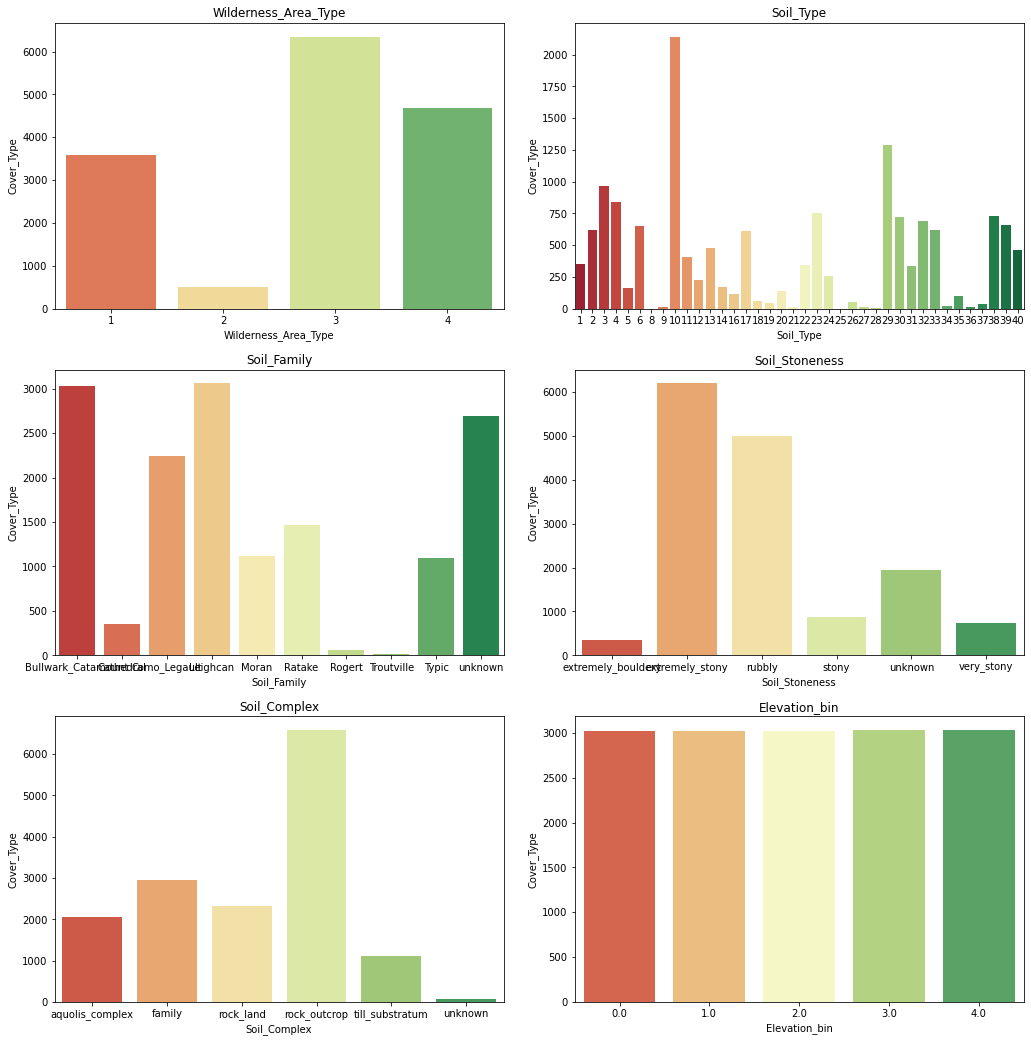

In [77]:
fig, axes = plt.subplots(3, 2 , figsize=(15, 15))
fig.tight_layout(pad=4)
for ax, feature in zip(axes.ravel(), categorical_features[1:]):
    cover_per_cate = cat_features.groupby(feature).count()
    sns.barplot(data=cover_per_cate, x=cover_per_cate.index, y=cover_per_cate["Cover_Type"], ax=ax, palette= 'RdYlGn' )
    ax.set_title(feature)

## Feature Engineering Benchmark

In [78]:
feature_bmx = train.copy()

In [79]:
feature_bmx = feature_bmx.dropna()

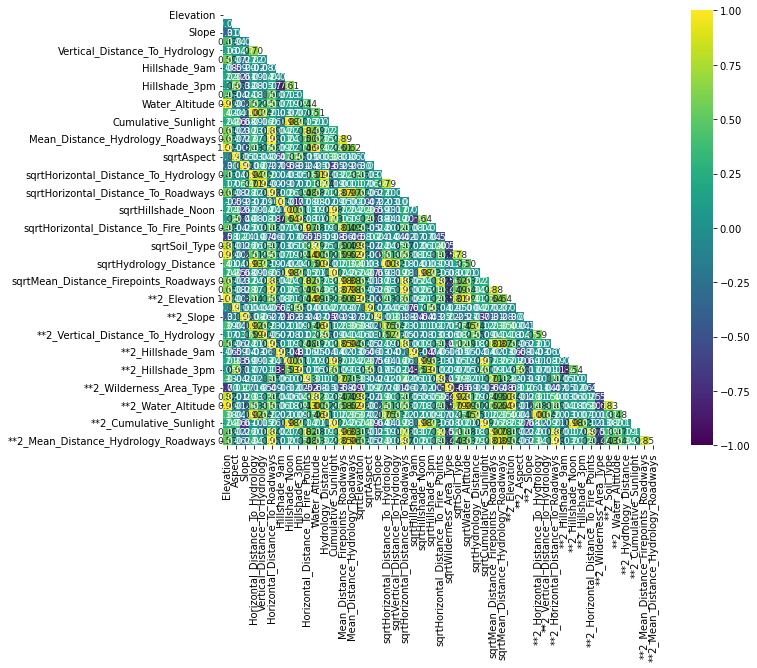

In [80]:
corrmat = feature_bmx.iloc[:,:].corr()
mask = np.triu(np.ones_like(corrmat, bool))

f, ax = plt.subplots(figsize = (12,8))
sns.heatmap(corrmat, cmap='viridis', vmax=1, vmin=-1, annot=True,fmt=".2f", square=True, mask=mask, annot_kws={"size": 9});

In [81]:
X = feature_bmx.drop("Cover_Type", 1) #all the columns less the predicitons
y = feature_bmx["Cover_Type"] #only the last columns¡


In [82]:
numerical_features = list(X.select_dtypes(include=["int64", "float64"]).columns)
categorical_features = list(X.select_dtypes(include=["category"]).columns)

In [83]:
print(f"Numerical features: {list(numerical_features)}")
print(f"Categorical features: {list(categorical_features)}")

Numerical features: ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Water_Altitude', 'Hydrology_Distance', 'Cumulative_Sunlight', 'Mean_Distance_Firepoints_Roadways', 'Mean_Distance_Hydrology_Roadways', 'sqrtElevation', 'sqrtAspect', 'sqrtSlope', 'sqrtHorizontal_Distance_To_Hydrology', 'sqrtVertical_Distance_To_Hydrology', 'sqrtHorizontal_Distance_To_Roadways', 'sqrtHillshade_9am', 'sqrtHillshade_Noon', 'sqrtHillshade_3pm', 'sqrtHorizontal_Distance_To_Fire_Points', 'sqrtWilderness_Area_Type', 'sqrtSoil_Type', 'sqrtWater_Altitude', 'sqrtHydrology_Distance', 'sqrtCumulative_Sunlight', 'sqrtMean_Distance_Firepoints_Roadways', 'sqrtMean_Distance_Hydrology_Roadways', '**2_Elevation', '**2_Aspect', '**2_Slope', '**2_Horizontal_Distance_To_Hydrology', '**2_Vertical_Distance_To_Hydrology', '**2_Horizontal_Distance_T

In [84]:
cat_pipe = Pipeline([
    ('Encoder', OneHotEncoder()),
    
])

num_pipe = Pipeline([
    ('scaler', StandardScaler()),
])

preprocessor = ColumnTransformer([
    ("cat", cat_pipe, categorical_features),
    ('num', num_pipe, numerical_features)]
    , remainder = 'passthrough')


In [85]:
X_transformed = preprocessor.fit_transform(X)

In [86]:
log_r = LogisticRegression()

log_r.fit(X_transformed, y)

y_hat = log_r.predict(X_transformed)
accuracy = accuracy_score(y, y_hat)

print(f"The accuracy of the second benchmark is: {accuracy}")

The accuracy of the second benchmark is: 0.7472283813747228


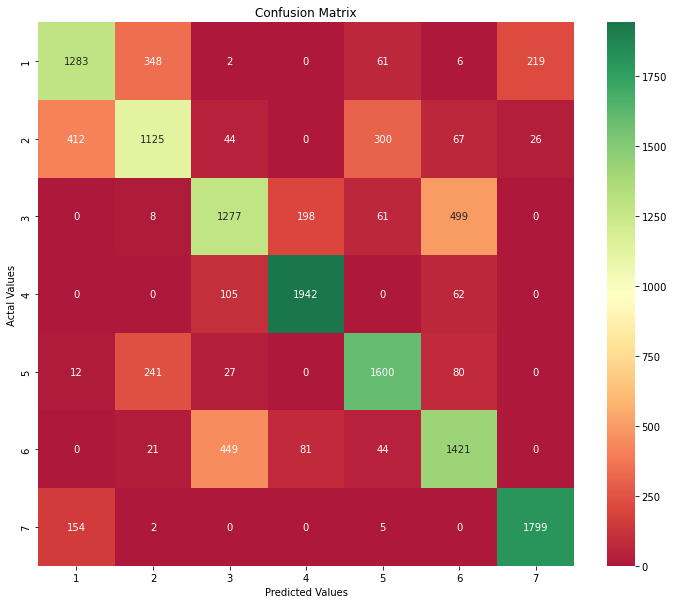

In [87]:
multic_cm = pd.DataFrame(confusion_matrix(y, y_hat), index= [1,2,3,4,5,6,7], columns= [1,2,3,4,5,6,7])

from matplotlib import pyplot as plt, patches
fig, axes = plt.subplots(figsize=(12, 10))

sns.heatmap(multic_cm, xticklabels=[1, 2, 3,4, 5, 6, 7], yticklabels=[1, 2, 3,4, 5, 6, 7], annot=True, cmap="RdYlGn",fmt=".0f", ax=axes, alpha=.9)

plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [88]:
feature_importance = pd.DataFrame({"Features":preprocessor.get_feature_names_out(), "Coefficient":log_r.coef_[0]}).sort_values("Coefficient", ascending=False)

In [89]:
feature_importance

,Features,Coefficient
113,num__**2_Water_Altitude,1.488188
101,num__**2_Elevation,1.449757
69,num__Elevation,1.434515
84,num__sqrtElevation,1.420424
79,num__Water_Altitude,1.215706
...,...,...
94,num__sqrtWilderness_Area_Type,-0.820612
49,cat__Soil_Family_unknown,-0.832381
111,num__**2_Wilderness_Area_Type,-0.924512
116,num__**2_Mean_Distance_Firepoints_Roadways,-0.999902


### Feature importance filtering

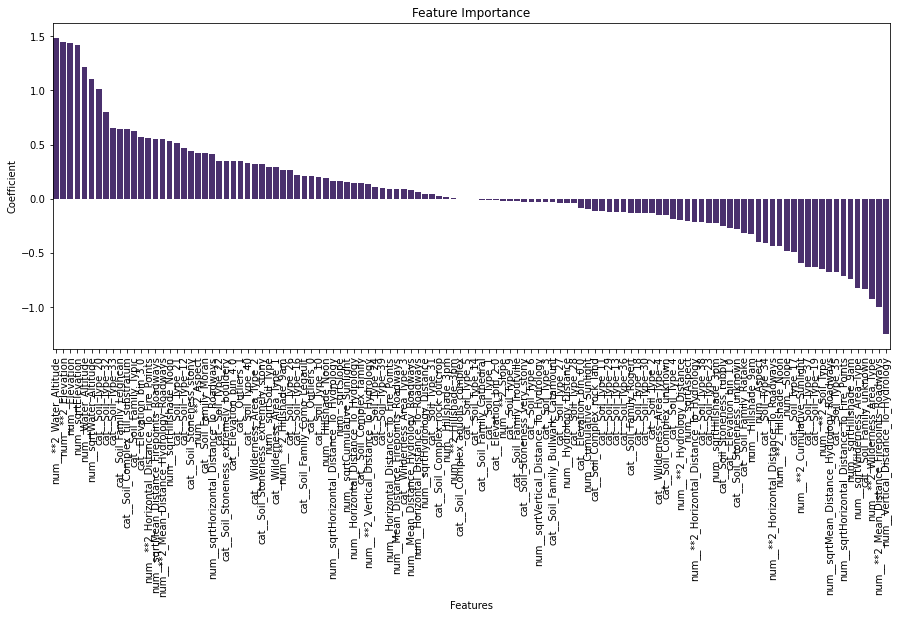

In [90]:
plt.figure(figsize=(15, 6))

sns.barplot(x=feature_importance["Features"], y=feature_importance["Coefficient"], color="#482677FF")
plt.title("Feature Importance")
plt.xticks(rotation=90)
plt.show()

[Index](#index)
<a id='14'></a>

# 3. Machine Learning

<a id='15'></a>
## 3.1. Train Validation Split

We split the dataset into a train and test set. 


In [91]:
x_train, x_val, y_train, y_val = train_test_split(X, y, random_state=4)

In [92]:
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(10485, 56)
(3496, 56)
(10485,)
(3496,)


In [93]:
print(f"Categorical features: {categorical_features}")
print(f"Numerical features: {numerical_features}")

Categorical features: ['Wilderness_Area_Type', 'Soil_Type', 'Soil_Family', 'Soil_Stoneness', 'Soil_Complex', 'Elevation_bin', 'Outliers']
Numerical features: ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Water_Altitude', 'Hydrology_Distance', 'Cumulative_Sunlight', 'Mean_Distance_Firepoints_Roadways', 'Mean_Distance_Hydrology_Roadways', 'sqrtElevation', 'sqrtAspect', 'sqrtSlope', 'sqrtHorizontal_Distance_To_Hydrology', 'sqrtVertical_Distance_To_Hydrology', 'sqrtHorizontal_Distance_To_Roadways', 'sqrtHillshade_9am', 'sqrtHillshade_Noon', 'sqrtHillshade_3pm', 'sqrtHorizontal_Distance_To_Fire_Points', 'sqrtWilderness_Area_Type', 'sqrtSoil_Type', 'sqrtWater_Altitude', 'sqrtHydrology_Distance', 'sqrtCumulative_Sunlight', 'sqrtMean_Distance_Firepoints_Roadways', 'sqrtMean_Distance_Hydrology_Roadways', '**2_Eleva

In [94]:
# define categorical pipeline
cat_pipe = Pipeline([
    ("encoder", OneHotEncoder())
])

# create the preprocessor with all the transformations
preprocessor_tree = ColumnTransformer([
    ("cat", cat_pipe, categorical_features),
], remainder = 'passthrough')

In [95]:
# define categorical pipeline
cat_pipe2 = Pipeline([
    ("encoder", OneHotEncoder())
])

# define numerical pipeline
num_pipe2 = Pipeline([
    ("transformer", PowerTransformer()),
    ("scaler", StandardScaler()),
    ("pca", PCA())
])

# create the preprocessor with all the transformations
preprocessor_not_tree = ColumnTransformer([
    ("cat", cat_pipe2, categorical_features),
    ("num", num_pipe2, numerical_features)
], remainder = 'passthrough')

In [96]:
log_r = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svm = SVC()
xgb = XGBClassifier()
xrf = ExtraTreesClassifier()

In [97]:
params1 = {}
params2 = {}
params3 = {}
params4 = {}
params5 = {}
params6 = {}

In [98]:
# create a dictionary with the algorithms and list of parameters

algo = {"LogisticReg":log_r, 
        "DecisionTree": dt,
        "RandomForest":rf,  
        "SVM":svm, 
        "XGBoost":xgb,
        "ExtraTreesClassifier":xrf,
}
params = [params1, params2, params3, params4, params5, params6]

In [99]:
algo_trees = ["DecisionTree", "RandomForest", "XGBoost", "ExtraTreesClassifier"]

In [101]:
#for loop that applies our pipeline transformations with each 
# logarithm, fits the x_train and y_train 
# predicts the values and calculates the RMSE, R2 and best parameters 

result = {}

for model, parameter in zip(algo.keys(), params):  
    if model in algo_trees:
        pipe = Pipeline([
        ("preprocessor_tree", preprocessor_tree),
        ("model",algo[model])
        ])

        search = GridSearchCV(
            pipe, 
            parameter, 
            scoring="accuracy",
            cv=10,
            n_jobs=-1
        )
    
        search.fit(x_train, y_train)
        y_hat = search.predict(x_val)

        accuracy=accuracy_score(y_val, y_hat)
        print(f"{model} Accuracy: {round(accuracy, 4)}")
        precision =precision_score(y_val,y_hat,average="weighted")
        recall = recall_score(y_val,y_hat,average="weighted")
        f1=f1_score(y_val,y_hat, average="weighted")
    
    
        result[model] = {"Accuracy": accuracy,
                        "Precision": precision,
                        "Recall" : recall,
                        'Mathewcoeff':matt_coef}
    else:
        pipe = Pipeline([
        ("preprocessor_not_tree", preprocessor_not_tree),
        ("model",algo[model])
        ])

        search = GridSearchCV(
            pipe, 
            parameter, 
            scoring="accuracy",
            cv=10,
            n_jobs=-1
            )
    
        search.fit(x_train, y_train)
        y_hat = search.predict(x_val)

        accuracy=accuracy_score(y_val, y_hat)
        print(f"{model} Accuracy: {round(accuracy, 4)}")
        precision =precision_score(y_val,y_hat,average="weighted")
        recall = recall_score(y_val,y_hat,average="weighted")
        matt_coef = matthews_corrcoef(y_val, y_hat)
    
    
        result[model] = {"Accuracy": accuracy,
                        "Precision": precision,
                        "Recall" : recall,
                        'Mathewcoeff':matt_coef}
            

LogisticReg Accuracy: 0.7245
DecisionTree Accuracy: 0.8021
RandomForest Accuracy: 0.8756
SVM Accuracy: 0.7975
[11:27:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Accuracy: 0.8644
ExtraTreesClassifier Accuracy: 0.8833


In [102]:
pd.DataFrame(result)

,LogisticReg,DecisionTree,RandomForest,SVM,XGBoost,ExtraTreesClassifier
Accuracy,0.724542,0.802059,0.875572,0.797483,0.864416,0.883295
Precision,0.719931,0.801393,0.873213,0.794421,0.862353,0.881711
Recall,0.724542,0.802059,0.875572,0.797483,0.864416,0.883295
Mathewcoeff,0.679132,0.679132,0.679132,0.763864,0.763864,0.763864


### Random forest

In [103]:
x_train_trans = preprocessor_tree.fit_transform(x_train)
x_val_trans = preprocessor_tree.transform(x_val)

In [104]:
rf = RandomForestClassifier( n_estimators = 200)

rf.fit(x_train_trans, y_train)

y_hat = rf.predict(x_train_trans)

accuracy=accuracy_score(y_train, y_hat)
precision =precision_score(y_train,y_hat,average="weighted")
recall = recall_score(y_train,y_hat,average="weighted")
f1=f1_score(y_train,y_hat, average="weighted")
matt_coef = matthews_corrcoef(y_train, y_hat)

print(f"Accuracy on train set: {accuracy}")
print(f"Precision on train set: {precision}")
print(f"Recall on train set: {recall}")
print(f"Matthew Coef on train set: {matt_coef}")

Accuracy on train set: 1.0
Precision on train set: 1.0
Recall on train set: 1.0
Matthew Coef on train set: 1.0


In [105]:
y_hat_new = rf.predict(x_val_trans)

accuracy=accuracy_score(y_val, y_hat_new)
precision =precision_score(y_val,y_hat_new,average="weighted")
recall = recall_score(y_val,y_hat_new,average="weighted")
f1=f1_score(y_val,y_hat_new, average="weighted")
matt_coef = matthews_corrcoef(y_val, y_hat_new)

print(f"Accuracy on train set: {accuracy}")
print(f"Precision on train set: {precision}")
print(f"Recall on train set: {recall}")
print(f"Matthew Coef on train set: {matt_coef}")

Accuracy on train set: 0.8741418764302059
Precision on train set: 0.8717122831459223
Recall on train set: 0.8741418764302059
Matthew Coef on train set: 0.8534032232538731


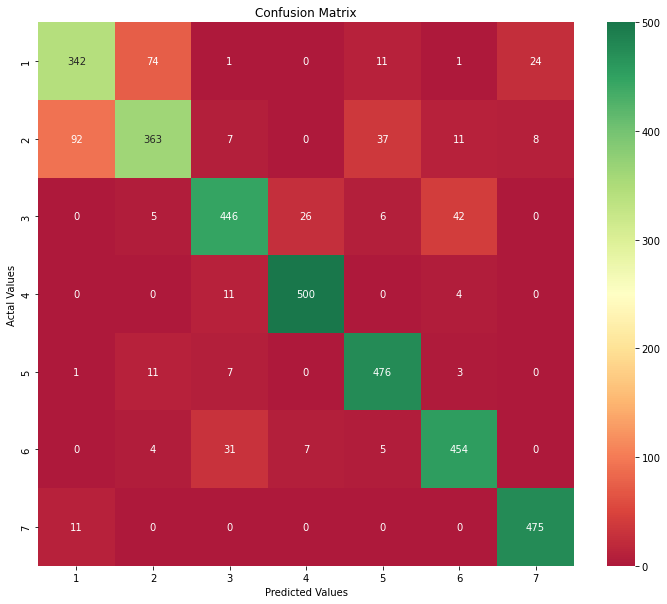

In [106]:
multic_cm = pd.DataFrame(confusion_matrix(y_val, y_hat_new), index=y_val.unique().sort_values(), columns=y_val.unique().sort_values())

from matplotlib import pyplot as plt, patches
fig, axes = plt.subplots(figsize=(12, 10))

sns.heatmap(multic_cm, xticklabels= y_val.unique().sort_values(), yticklabels = y_val.unique().sort_values() ,annot=True, cmap="RdYlGn",fmt=".0f", ax=axes, alpha=.9)

#rectangle = patches.Rectangle((-.25, 0.5), 1, 20, edgecolor='white',facecolor="green", linewidth=2, angle=-45, alpha=.5)
#axes.add_patch(rectangle)

plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

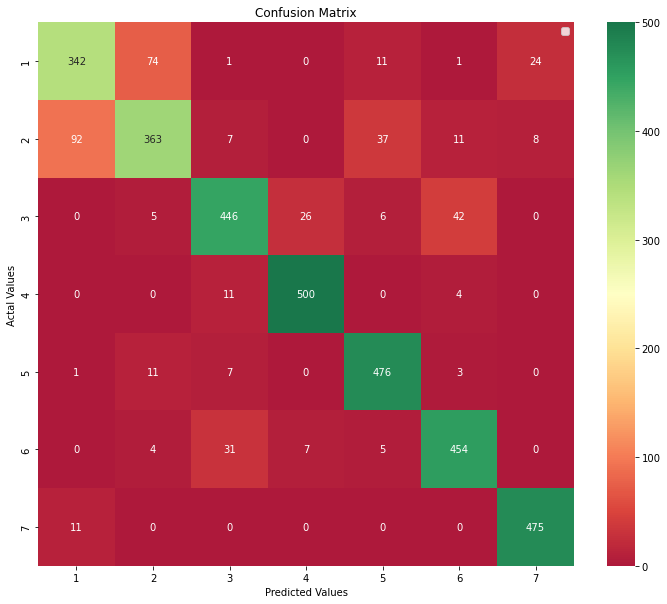

In [107]:
from matplotlib import pyplot as plt, patches
fig, axes = plt.subplots(figsize=(12, 10))

sns.heatmap(multic_cm, xticklabels= y_val.unique().sort_values(), yticklabels = y_val.unique().sort_values() ,annot=True, cmap="RdYlGn",fmt=".0f", ax=axes, alpha=.9)

#rectangle = patches.Rectangle((-.25, 0.5), 1, 20, edgecolor='white',facecolor="green", linewidth=2, angle=-45, alpha=.5)
#axes.add_patch(rectangle)

plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.legend(["True Positive Diagonal"])
plt.show()

# END OF PROJECT
